<a href="https://colab.research.google.com/github/dlguswn3659/class-MachineLearning/blob/master/assignment8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

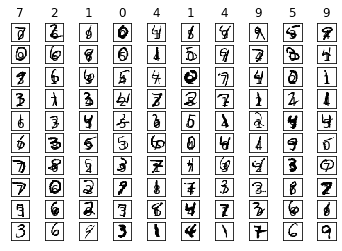

In [22]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import matplotlib.animation as animation
from scipy import stats 
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets.samples_generator import make_regression 
import csv
import math
# from google.colab import files

# uploaded = files.upload()

file_data   = "mnist_test.csv"
handle_file = open(file_data, "r")
data        = handle_file.readlines()
handle_file.close()

size_row    = 28    # height of the image
size_col    = 28    # width of the image

num_image   = len(data)
count       = 0     # count for the number of images

#
# make a matrix each column of which represents an images in a vector form 
#
list_image  = np.empty((size_row * size_col, num_image), dtype=float)
list_label  = np.empty(num_image, dtype=int)

for line in data:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])

    list_label[count]       = label
    list_image[:, count]    = im_vector    

    count += 1

# 
# plot first 100 images out of 10,000 with their labels
# 
f1 = plt.figure(1)

for i in range(100):

    label       = list_label[i]
    im_vector   = list_image[:, i]
    im_matrix   = im_vector.reshape((size_row, size_col))

    plt.subplot(10, 10, i+1)
    plt.title(label)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()


In [0]:
vector_list = np.arange(10*size_col*size_col).reshape(10, size_row, size_col)

In [24]:
print(num_image)

10000


In [0]:
for nx in range(0, 10):
  for ny in range(0, size_row):
    for nz in range(0, size_col):
      vector_list[nx][ny][nz] = 0

In [26]:
label_list = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

for i in range(num_image):
  label_list[list_label[i]] = label_list[list_label[i]] + 1

print(label_list)

[980, 1135, 1032, 1010, 982, 892, 958, 1028, 974, 1009]


In [0]:
for i in range(num_image):

    label       = list_label[i]
    im_vector   = list_image[:, i]
    im_matrix   = im_vector.reshape((size_row, size_col))
    # print(im_matrix)

    for ny in range(0, size_row):
      for nz in range(0, size_col):
        vector_list[label][ny][nz] = vector_list[label][ny][nz] + im_matrix[ny][nz]

# print(vector_list)

In [0]:
#평균내기

for i in range(0, 10):
  vector_list[i] = vector_list[i] / label_list[i]

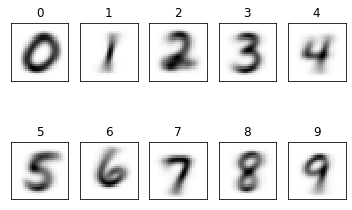

In [29]:
for i in range(10):

    plt.subplot(2, 5, i+1)
    plt.title(i)
    plt.imshow(vector_list[i], cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()

In [0]:
theta = np.random.normal(size=(size_row*size_col))

In [0]:
def sigmoid(z): 
  g = 1 / (1 + np.exp(-z)) 
  
  return g 

In [32]:
z_list = []
for i in range(0, 10):
  z_list.append(0.0)

print(z_list)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [33]:
for i in range(0, num_image):
  label       = list_label[i]
  im_vector   = list_image[:, i]
  im_matrix   = im_vector.reshape((size_row, size_col))
  y = 0
  for ny in range(0, size_row):
      for nz in range(0, size_col):
        y = y + theta[size_col*ny + nz]*im_matrix[ny][nz]
  # print(y)
  z_list[label] = z_list[label] + sigmoid(y)
  # print(sigmoid(y))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


In [0]:
#평균내기

for i in range(0, 10):
  z_list[i] = z_list[i] / label_list[i]

In [35]:
print(z_list)































[0.21317086068789282, 0.7162915789733304, 0.6846651399967225, 0.6613834054405635, 0.7762332538043417, 0.5639492917922968, 0.45569785776232136, 0.8283404048708275, 0.8439432258287255, 0.8107237928873425]


# **Machine Learning Assignment08** #

Name : 이현주

Student # : 20184060

# **1. Plot the average image [5pt]**

- plot the average images of the same label for each digit
- arrange the subplots in 2x5 array for the 10 average images and present the label at the title of each subplot in the increasing order of the label

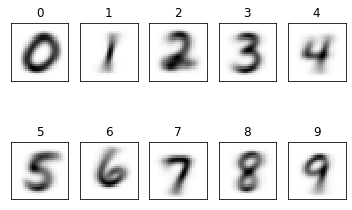

In [36]:
for i in range(10):

    plt.subplot(2, 5, i+1)
    plt.title(i)
    plt.imshow(vector_list[i], cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()

# **2. Present the output of the neural network with random weights [9pt]**

- consider a neural network with a fully connected layer using a logistic unit without a bias
- assign random values from the normal distribution N(0,1)\mathcal{N}(0, 1)N(0,1) with mean 0 and standard deviation 1 to the weights of the fully connected layer using a logistic unit without a bias
- compute the forward propagation and take the average of the output values for the images of the same label
- present the average values for each label in the increasing order of the label

In [37]:
for i in range(10):
  print("The average values for ", i, " : ", end='')
  print(z_list[i], end='\n\n')

The average values for  0  : 0.21317086068789282

The average values for  1  : 0.7162915789733304

The average values for  2  : 0.6846651399967225

The average values for  3  : 0.6613834054405635

The average values for  4  : 0.7762332538043417

The average values for  5  : 0.5639492917922968

The average values for  6  : 0.45569785776232136

The average values for  7  : 0.8283404048708275

The average values for  8  : 0.8439432258287255

The average values for  9  : 0.8107237928873425

